### 데이터 확인

In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv('train.csv', encoding='CP949')
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
dataP = data.copy()

In [5]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


C:\Users\028\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


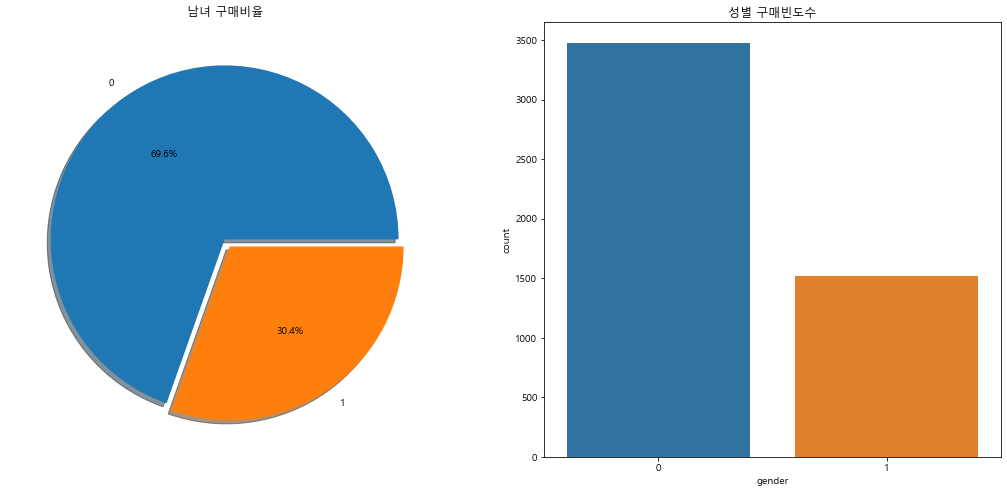

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = dataP.gender.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율')
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('gender', data=dataP, ax=ax[1])
ax[1].set_title('성별 구매빈도수')
plt.show()

C:\Users\028\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\028\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


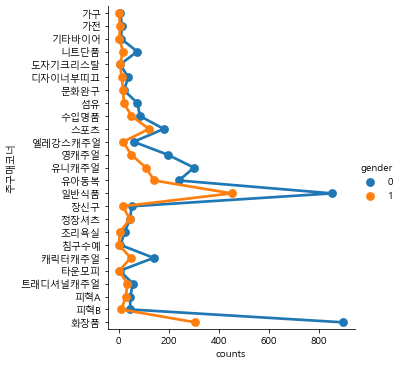

In [7]:
# 남녀별 주구매코너별 구매율
gender_catcnt = dataP.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['gender', '주구매코너', 'counts']

sns.factorplot('counts', '주구매코너', hue='gender', data=df_catecnt)

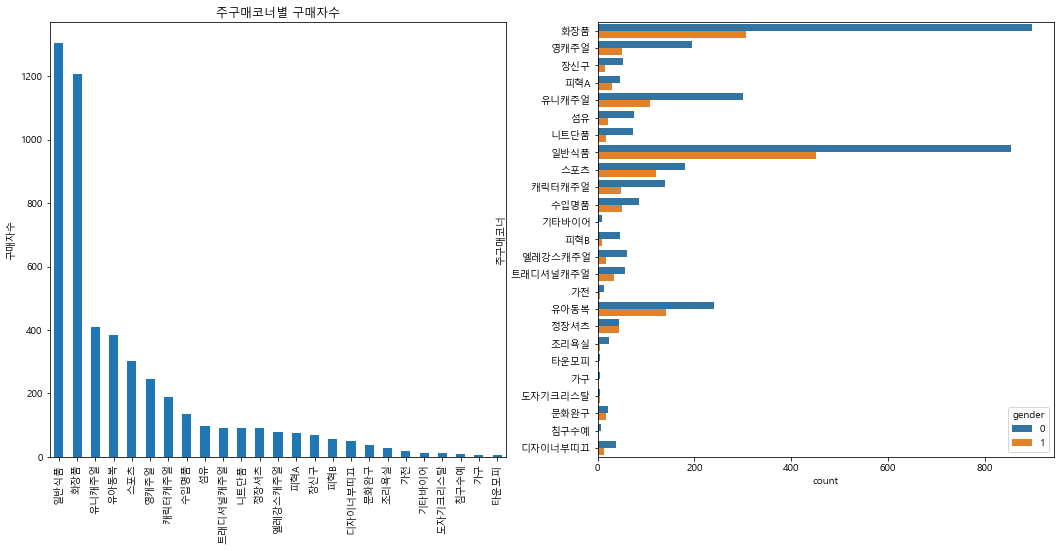

In [8]:
# 일반식품 -> 화장품 순으로 구매자수가 많음
# 여자는 화장품 -> 일반식풉 -> 유니캐주얼 순이고, 남자는 일반식품 -> 화장품 -> 유아동복 순으로 구매함.
f, ax = plt.subplots(1,2, figsize=(18,8))
dataP['주구매코너'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=dataP, ax=ax[1])
plt.show()

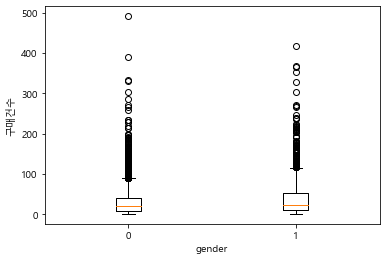

In [9]:
y_female = dataP[dataP['gender'] == 0]
y_male = dataP[dataP['gender'] == 1]

y_buy = [y_female['구매건수'], y_male['구매건수']]


plt.boxplot(y_buy)

plt.xlabel('gender')
plt.ylabel('구매건수')
ax = plt.gca()

plt.setp(ax, xticklabels = [0,1])
plt.show()

In [10]:
pd.crosstab(dataP['주구매코너'], dataP['gender'], margins=True).style.background_gradient(cmap='summer_r')

gender,0,1,All
주구매코너,,,
가구,6,1,7
가전,13,5,18
기타바이어,9,3,12
니트단품,74,17,91
도자기크리스탈,6,5,11
디자이너부띠끄,38,13,51
문화완구,21,17,38
섬유,75,21,96
수입명품,85,51,136


### Missing Values 처리

In [11]:
obj=['주구매코너'] 

In [12]:
dataP[obj].head()

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A


In [13]:
dataP[obj] = dataP[obj].apply(lambda x: x.astype('category').cat.codes) 
# cat.code : 문자가 범주형으로 바뀌면 생기는 코드
# apply : 각각의 값별로 함수를 적용

In [14]:
dataP[obj].head()

,주구매코너
0,24
1,11
2,15
3,24
4,22


In [15]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [16]:
dataP.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [17]:
dataP.shape

(5000, 18)

In [18]:
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]

In [19]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(dataP[con])

SimpleImputer(strategy='most_frequent')

In [20]:
x = imputer_con.transform(dataP[con])
x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [21]:
dataP[con] = x
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [22]:
dataP.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

### Modeling

In [23]:
dataPT = dataP.copy()

# 데이터 세트를 설명변수와 목적변수로 분할
Y = np.array(dataPT['gender'])
X = np.array(dataPT.drop(['gender'], axis=1))

# y가 1과 0인 데이터의 건수를 카운트
np.sum(Y == 1), np.sum(Y == 0)


(1521, 3479)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [26]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       883
           1       0.42      0.11      0.17       367

    accuracy                           0.69      1250
   macro avg       0.57      0.52      0.49      1250
weighted avg       0.63      0.69      0.62      1250



In [27]:
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test);
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       883
           1       0.54      0.02      0.04       367

    accuracy                           0.71      1250
   macro avg       0.62      0.51      0.43      1250
weighted avg       0.66      0.71      0.60      1250



In [28]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test);
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       883
           1       0.00      0.00      0.00       367

    accuracy                           0.71      1250
   macro avg       0.35      0.50      0.41      1250
weighted avg       0.50      0.71      0.58      1250



C:\Users\028\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from imblearn.under_sampling import TomekLinks
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       883
           1       0.43      0.31      0.36       367

    accuracy                           0.68      1250
   macro avg       0.59      0.57      0.57      1250
weighted avg       0.65      0.68      0.66      1250



In [30]:
from imblearn.combine import SMOTETomek
XX, yy = SMOTETomek().fit_sample(X_train, y_train)
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(XX, yy)
y_pred2 = tree2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.51      0.61       883
           1       0.35      0.64      0.45       367

    accuracy                           0.55      1250
   macro avg       0.56      0.57      0.53      1250
weighted avg       0.65      0.55      0.56      1250



### Features engineering

In [31]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = dataP.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
dataP_ = pd.merge(dataP, df0, on='주구매코너')
# dataP_.head()
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
dataP_.head()

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,25740
1,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,25740
2,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24,25740
3,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24,25740
4,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24,25740


In [32]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(dataP_)
dataPP = dropFeatures(dataP_) 
dataPP[(dataPP['주구매코너']==2)].head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4123,363,0,90960,3.0,4,20.0,25.0,2,149,90960.000,90960.000,363840.000,454800.000,90960.000,90960.000,90960.000,1.250
4124,4822,0,248049,2.3,10,10.5,33.3,2,149,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
4125,11617,1,124767,3.8,8,25.0,62.5,2,149,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,124766.667,1.500
4126,12979,0,79250,1.7,10,0.0,33.3,2,149,554750.000,396250.000,79250.000,158500.000,79250.000,792500.000,79250.000,4.000
4127,16414,0,31625,1.0,6,12.5,14.3,2,149,63250.000,189750.000,31625.000,94875.000,158125.000,31625.000,31625.000,1.143


In [33]:
dataPP['평균할부개월수'].value_counts()

1.0    501
2.0    396
1.7    330
1.8    318
1.9    317
      ... 
8.2      1
5.1      1
5.7      1
5.2      1
5.3      1
Name: 평균할부개월수, Length: 61, dtype: int64

In [34]:
# 평균할부개월수를 1개월,2개월,3개월,4개월이상으로 구분
dataPP.loc[dataPP['평균할부개월수'] <= 1, '평균할부개월수2'] = '1개월'
dataPP.loc[(dataPP['평균할부개월수'] > 1) & (dataPP['평균할부개월수'] <= 2), '평균할부개월수2'] = '2개월'
dataPP.loc[(dataPP['평균할부개월수'] > 2) & (dataPP['평균할부개월수'] <= 3), '평균할부개월수2'] = '3개월'
dataPP.loc[dataPP['평균할부개월수'] > 3, '평균할부개월수2'] = '4개월'
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,408060.000,272040.000,272040.000,45340.000,45340.000,408060.000,1.500,2개월
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,701428.571,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000,2개월
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,752200.000,150440.000,752200.000,150440.000,150440.000,150440.000,1.667,3개월
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,352430.769,704861.538,176215.385,881076.923,88107.692,88107.692,1.444,2개월
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,359255.000,82905.000,303985.000,27635.000,27635.000,138175.000,2.667,1개월


In [35]:
dataPP['평균할부개월수2'].isnull().sum()

0

In [36]:
# 더미변수로 변환
dataPP_1 = pd.get_dummies(dataPP['평균할부개월수2'])
dataPP_1.head()

,1개월,2개월,3개월,4개월
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [37]:
dataPP.dtypes

custid         int64
gender         int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
수입상품_구매비율    float64
주말방문비율       float64
주구매코너           int8
코너별구매건         int64
아침구매액        float64
점심구매액        float64
저녁구매액        float64
봄구매액         float64
여름구매액        float64
가을구매액        float64
겨울구매액        float64
내점구매율        float64
평균할부개월수2      object
dtype: object

In [38]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = dataPP[['custid','gender','평균구매가격', '평균할부개월수', '구매브랜드종류','수입상품_구매비율', '주말방문비율','주구매코너','코너별구매건','아침구매액','점심구매액','저녁구매액','봄구매액','여름구매액','가을구매액','겨울구매액','내점구매율']]
tmp1.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,408060.000,272040.000,272040.000,45340.000,45340.000,408060.000,1.500
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,701428.571,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,752200.000,150440.000,752200.000,150440.000,150440.000,150440.000,1.667
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,352430.769,704861.538,176215.385,881076.923,88107.692,88107.692,1.444
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,359255.000,82905.000,303985.000,27635.000,27635.000,138175.000,2.667


In [39]:
dataPP = pd.concat([tmp1, dataPP_1], axis=1)
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,...,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,...,272040.000,272040.000,45340.000,45340.000,408060.000,1.500,0,1,0,0
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,...,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000,0,1,0,0
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,...,150440.000,752200.000,150440.000,150440.000,150440.000,1.667,0,0,1,0
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,...,704861.538,176215.385,881076.923,88107.692,88107.692,1.444,0,1,0,0
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,...,82905.000,303985.000,27635.000,27635.000,138175.000,2.667,1,0,0,0


C:\Users\028\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\028\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

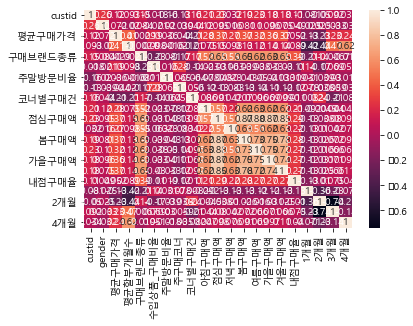

In [40]:
sns.heatmap(dataPP.corr(), annot=True)

In [41]:
# 전처리한 결과를 CSV파일로 보존
dataPP.to_csv('depart-exam.csv', encoding='utf-8-sig', index=False)

### 불균형데이터의 균형화(남녀 비율 조정)

In [42]:
dataPP = pd.read_csv('depart-exam.csv')
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,...,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,...,272040.000,272040.000,45340.000,45340.000,408060.000,1.500,0,1,0,0
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,...,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000,0,1,0,0
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,...,150440.000,752200.000,150440.000,150440.000,150440.000,1.667,0,0,1,0
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,...,704861.538,176215.385,881076.923,88107.692,88107.692,1.444,0,1,0,0
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,...,82905.000,303985.000,27635.000,27635.000,138175.000,2.667,1,0,0,0


In [43]:
dataPP['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [44]:
# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
# 복합 샘플링
from imblearn.combine import SMOTETomek

In [45]:
dataPT = dataPP.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

# 데이터 세트를 설명변수와 목적변수로 분할
Y = np.array(dataPD['gender'])
X = np.array(dataPD.drop(['gender'], axis=1))

# y가 1과 0인 데이터의 건수를 카운트
np.sum(Y == 1), np.sum(Y == 0)


(1521, 3479)

In [46]:
# y가 1인 데이터의 건수에 맞춰서 복합 샘플링
sampler = SMOTETomek(random_state=0)
X, Y = sampler.fit_resample(X, Y)

# y가 1과 0인 데이터 건수를 카운트
np.sum(Y == 1), np.sum(Y == 0)

(3303, 3303)

### 피처 선택과 결정트리의 작성

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [48]:
select = SelectFromModel(RandomForestClassifier(), threshold=None)
X_sel5 = select.fit(X, Y).transform(X)

# 변수의 중요도가 나온다.
print("X.shape: {}, X_train_fs.shape: {}".format(
    X.shape, X_sel5.shape))

X.shape: (6606, 15), X_train_fs.shape: (6606, 9)


In [49]:
# Scikit-learn의 로드
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

# K-Fold교차 검증
kf = KFold(n_splits=10, shuffle=True)
# 모델의 정밀도를 보존하기 위한 준비
scores = []
# 데이터를 셔플하고, 훈련데이터와 테스트 데이터를 분활
for train_id, test_id in kf.split(X_sel5):
    # 훈련 데이터를 사용한 모델을 작성
    x = X_sel5[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X_sel5[test_id])
    # 모델의 정밀도를 계산하고 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std())

0.7099672213817447 0.01713552277284432


### 모델의 정밀도 향상

In [50]:
# 그리드 서치를 사용한 모델의 성능 개선

# Scikit-learn을 로드
from sklearn.model_selection import GridSearchCV

# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                      cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

# 그리드 서치 실행
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [51]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.69708476596525
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50}


### roc curve

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
# 모델이 예측한 확률이 필요
# 0, 1 중 1의 값만 뽑아라
fpr, tpr, _ = roc_curve(Y[test_id], clf_gs.predict_proba(X[test_id])[:,1])
auc(fpr, tpr)

0.8562415047206202

In [54]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

In [55]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X[train_id], Y[train_id])
pred_dummy = dummy.predict(X[test_id])

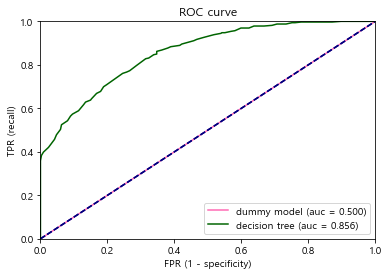

In [56]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y[test_id], 
                                    dummy.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y[test_id], 
                                  clf_gs.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')

### test 데이터파일 적용

In [57]:
new = pd.read_csv('test.csv', encoding='CP949')
new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [58]:
ndf = new.copy()

In [59]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(ndf[con])

SimpleImputer(strategy='most_frequent')

In [60]:
x = imputer_con.transform(ndf[con])
x

array([[ 5.,  4.,  7., ..., 13.,  1., 11.],
       [13.,  8., 10., ...,  4., 10., 25.],
       [ 6.,  7.,  3., ...,  3.,  1., 18.],
       ...,
       [ 4.,  1.,  6., ...,  1.,  1., 12.],
       [ 1.,  7.,  4., ...,  2.,  4.,  8.],
       [23., 20.,  9., ..., 11.,  4., 61.]])

In [61]:
ndf[con] = x
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [62]:
ndf[obj] = ndf[obj].apply(lambda x: x.astype('category').cat.codes) 

In [63]:
ndf.head(3)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13


In [64]:
ndf.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [65]:
ndt0 = ndf.groupby(['주구매코너'])['구매건수'].agg(sum)   
ndf0 = ndt0.to_frame().reset_index()
ndf0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
ndf_ = pd.merge(ndf, ndf0, on='주구매코너')
ndf_.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,1315
1,100092,2973500,38,78250,4.2,20,16,7.9,43.8,10.0,10.0,13.0,5.0,9.0,3.0,26.0,15,1315
2,100130,3633456,41,88621,3.2,27,16,2.4,43.8,7.0,17.0,4.0,13.0,1.0,27.0,13.0,15,1315
3,100170,1536790,8,192099,2.5,8,5,12.5,0.0,2.0,3.0,2.0,1.0,1.0,1.0,8.0,15,1315
4,100274,1101000,8,137625,5.9,5,5,25.0,0.0,1.0,3.0,5.0,1.0,3.0,1.0,5.0,15,1315


In [66]:
def createFeatures(ndf_p):
    ndf_p['아침구매액'] = np.round(ndf_p['총구매액']*(ndf_p['아침_구매건수'] /ndf_p['구매건수'] ), 3)
    ndf_p['점심구매액'] = np.round(ndf_p['총구매액']*(ndf_p['점심_구매건수'] /ndf_p['구매건수'] ), 3)
    ndf_p['저녁구매액'] = np.round(ndf_p['총구매액']*(ndf_p['저녁_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['봄구매액']   = np.round(ndf_p['총구매액']*(ndf_p['봄_구매건수'] /ndf_p['구매건수'] ), 3) 
    ndf_p['여름구매액'] = np.round(ndf_p['총구매액']*(ndf_p['여름_구매건수'] /ndf_p['구매건수'] ), 3) 
    ndf_p['가을구매액'] = np.round(ndf_p['총구매액']*(ndf_p['가을_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['겨울구매액'] = np.round(ndf_p['총구매액']*(ndf_p['겨울_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['내점구매율'] = np.round(ndf_p['구매건수'] /ndf_p['내점일수'], 3)

def dropFeatures(ndf_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return ndf_p.drop(drop_cols, axis=1)

createFeatures(ndf_)
ndf0 = dropFeatures(ndf_) 
ndf0[(ndf0['주구매코너']==2)].head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
1122,100008,62068,1.2,8,11.1,33.3,2,158,62067.778,310338.889,248271.111,62067.778,62067.778,248271.111,248271.111,1.000
1123,100281,183600,4.4,5,20.0,25.0,2,158,183600.000,918000.000,183600.000,183600.000,183600.000,183600.000,550800.000,1.250
1124,100371,85037,1.9,39,7.8,69.0,2,158,85036.863,2551105.882,1785774.118,425184.314,1530663.529,935405.490,1445626.667,1.759
1125,100386,155873,3.1,18,9.1,33.3,2,158,779363.636,2182218.182,467618.182,1402854.545,467618.182,1402854.545,155872.727,1.467
1126,100390,200447,1.2,13,5.9,12.5,2,158,200447.059,2004470.588,1403129.412,200447.059,2605811.765,601341.176,200447.059,2.125


In [67]:
# 평균할부개월수를 1개월,2개월,3개월,4개월이상으로 구분
ndf0.loc[ndf0['평균할부개월수'] <= 1, '평균할부개월수2'] = '1개월'
ndf0.loc[(ndf0['평균할부개월수'] > 1) & (ndf0['평균할부개월수'] <= 2), '평균할부개월수2'] = '2개월'
ndf0.loc[(ndf0['평균할부개월수'] > 2) & (ndf0['평균할부개월수'] <= 3), '평균할부개월수2'] = '3개월'
ndf0.loc[ndf0['평균할부개월수'] > 3, '평균할부개월수2'] = '4개월'
ndf0.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562,3개월
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375,4개월
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562,4개월
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600,3개월
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600,4개월


In [68]:
ndf0['평균할부개월수2'].isnull().sum()

0

In [69]:
# 더미변수로 변환
ndf0_1 = pd.get_dummies(ndf0['평균할부개월수2'])
ndf0_1.head()

,1개월,2개월,3개월,4개월
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [70]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = ndf0[['custid','평균구매가격', '평균할부개월수', '구매브랜드종류','수입상품_구매비율', '주말방문비율','주구매코너','코너별구매건','아침구매액','점심구매액','저녁구매액','봄구매액','여름구매액','가을구매액','겨울구매액','내점구매율']]
tmp1.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600


In [71]:
ndf0 = pd.concat([tmp1, ndf0_1], axis=1)
ndf0.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562,0,0,1,0
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375,0,0,0,1
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562,0,0,0,1
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600,0,0,1,0
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600,0,0,0,1


In [72]:
ndf1 = ndf0.copy()
ndf2 = ndf1.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
ndf2.head()

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월
0,100001,137560,19,1315,1788280.000,1513160.000,962920.000,1238040.000,687800.000,550240.000,1.562,0,0,1,0
1,100092,78250,20,1315,704250.000,2034500.000,1017250.000,391250.000,782500.000,782500.000,2.375,0,0,0,1
2,100130,88621,27,1315,88620.878,1152071.415,354483.512,1152071.415,620346.146,1506554.927,2.562,0,0,0,1
3,100170,192099,8,1315,192098.750,1536790.000,384197.500,192098.750,384197.500,576296.250,1.600,0,0,1,0
4,100274,137625,5,1315,412875.000,688125.000,688125.000,137625.000,137625.000,412875.000,1.600,0,0,0,1


In [73]:
new_D = ndf2.copy()
new_T = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
new_T = new_T.drop('gender', axis=1)
new_T.tail(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월
4998,49732,314259,23,2219,1.477015e+07,3.928233e+07,8484982.398,2.388365e+07,1.445590e+07,1.319886e+07,2.449,0,0,0,1
4999,49954,183065,10,2219,5.491941e+05,2.562906e+06,1098388.235,1.830647e+05,7.322588e+05,1.098388e+06,1.308,0,0,0,1


In [74]:
display(new_D.shape, new_T.shape)

(5000, 15)

(5000, 15)

In [75]:
new_D['pred']       = clf_gs.predict(new_T)
new_D['pred_prob']  = clf_gs.predict_proba(new_T)[:,1]

In [76]:
new.sort_values(by=['custid']).tail(3)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,NaN,NaN,12.0,일반식품
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,NaN,7.0,4.0,3.0,2.0,4.0,8.0,화장품
4999,105000,2568073,76,33790,1.6,23,35,10.5,22.9,23.0,20.0,9.0,24.0,11.0,4.0,61.0,일반식품


In [77]:
new_D.sort_values(by=['custid']).tail(3)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,pred,pred_prob
2423,104998,80077,7,74942,80076.917,960923.000,480461.500,80076.917,320307.667,80076.917,1.714,0,1,0,0,0,0.322581
3743,104999,56186,12,26123,112371.429,449485.714,224742.857,168557.143,56185.714,393300.000,1.556,0,1,0,0,0,0.388889
2424,105000,33790,23,74942,371694.776,2061216.487,304113.908,810970.421,777179.987,675808.684,2.171,0,1,0,0,0,0.074074


In [78]:
dfN = new_D[['custid', 'pred', 'pred_prob']]
#dfN
targets = pd.merge(new, dfN, on='custid')
targets.tail(5)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,pred,pred_prob
4995,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,NaN,1.0,1.0,3.0,일반식품,0,0.322581
4996,104997,628700,13,48362,1.8,10,7,7.7,42.9,NaN,5.0,1.0,7.0,NaN,3.0,10.0,조리욕실,1,0.519868
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,NaN,NaN,12.0,일반식품,0,0.322581
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,NaN,7.0,4.0,3.0,2.0,4.0,8.0,화장품,0,0.388889
4999,105000,2568073,76,33790,1.6,23,35,10.5,22.9,23.0,20.0,9.0,24.0,11.0,4.0,61.0,일반식품,0,0.074074


C:\Users\028\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


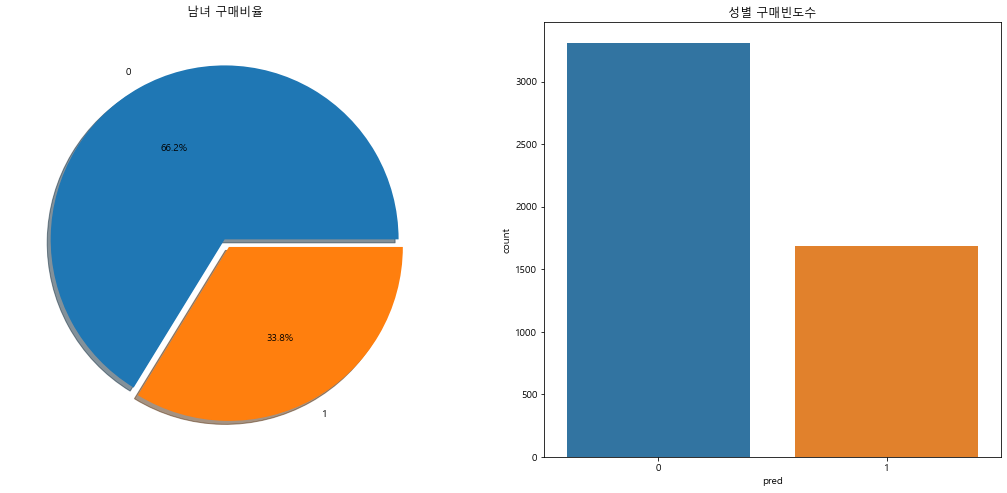

In [79]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = targets.pred.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율')
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('pred', data=targets, ax=ax[1])
ax[1].set_title('성별 구매빈도수')
plt.show()

In [80]:
# 예측한 Data를 파일로 저장하여 제출한다.
targets.sort_values(by="custid", ascending=False).to_csv("depart-exam-pred.csv", encoding='utf-8-sig', index=False)
pd.read_csv("depart-exam-pred.csv").count()

custid       5000
총구매액         5000
구매건수         5000
평균구매가격       5000
평균할부개월수      5000
구매브랜드종류      5000
내점일수         5000
수입상품_구매비율    5000
주말방문비율       5000
가을_구매건수      4052
겨울_구매건수      4089
봄_구매건수       4319
여름_구매건수      4009
아침_구매건수      3608
저녁_구매건수      3975
점심_구매건수      4861
주구매코너        5000
pred         5000
pred_prob    5000
dtype: int64

In [81]:
result_data = pd.read_csv('depart-exam-pred.csv')
result_data

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,pred,pred_prob
0,105000,2568073,76,33790,1.6,23,35,10.5,22.9,23.0,20.0,9.0,24.0,11.0,4.0,61.0,일반식품,0,0.074074
1,104999,786600,14,56186,1.7,12,9,14.3,55.6,NaN,7.0,4.0,3.0,2.0,4.0,8.0,화장품,0,0.388889
2,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,NaN,NaN,12.0,일반식품,0,0.322581
3,104997,628700,13,48362,1.8,10,7,7.7,42.9,NaN,5.0,1.0,7.0,NaN,3.0,10.0,조리욕실,1,0.519868
4,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,NaN,1.0,1.0,3.0,일반식품,0,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠,0,0.325203
4996,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품,1,0.606383
4997,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복,0,0.060000
4998,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0,0.000000


In [82]:
gender_freq = result_data.pred.value_counts()
gender_freq

0    3312
1    1688
Name: pred, dtype: int64